In [8]:
import pandas as pd

from tqdm import tqdm

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split

from news_vec.utils import read_json_gz_lines

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [10]:
accs = pd.DataFrame(list(tqdm(read_json_gz_lines('../data/clf-imp-acc-ts.json/'))))

136500it [00:00, 434123.16it/s]


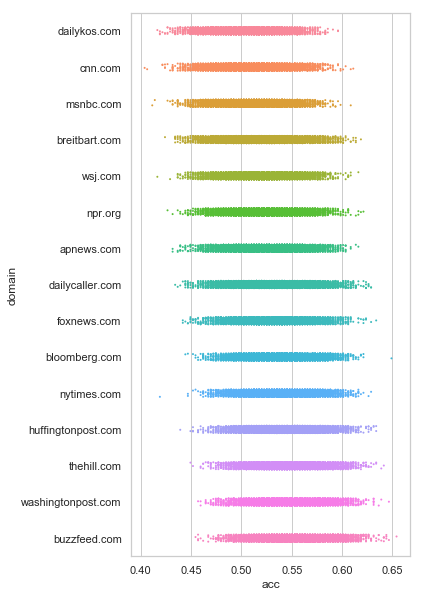

In [12]:
order = accs.groupby('domain').mean().sort_values('acc').index
plt.figure(figsize=(5,10))
sns.stripplot(x='acc', y='domain', data=accs, s=2, order=order)

wsj.com


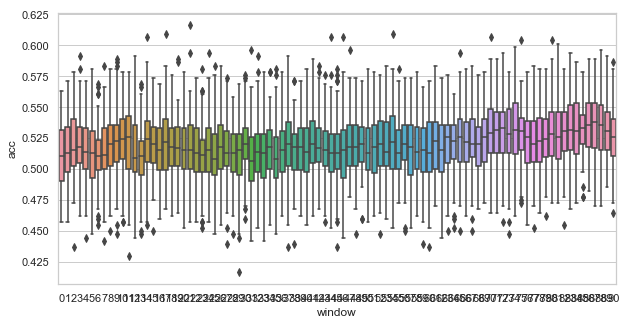

dailycaller.com


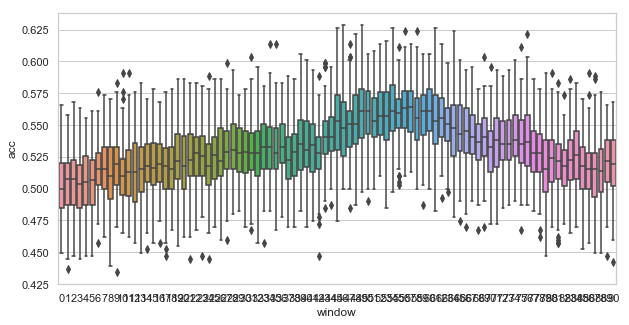

nytimes.com


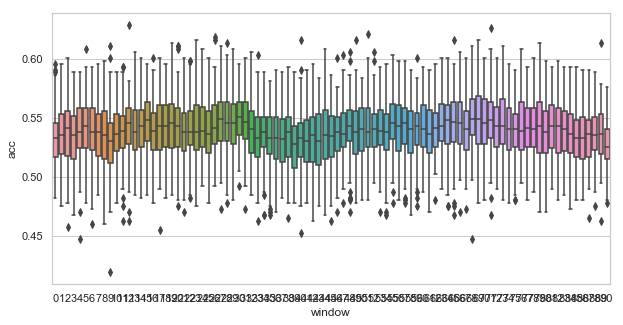

washingtonpost.com


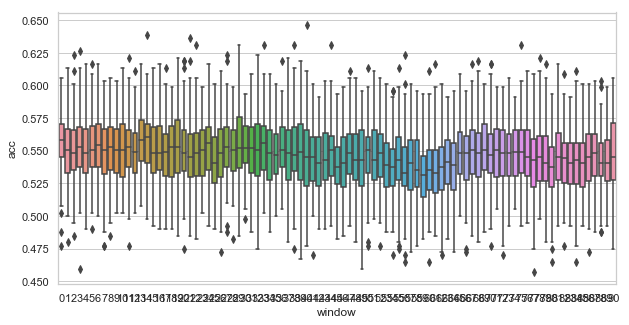

msnbc.com


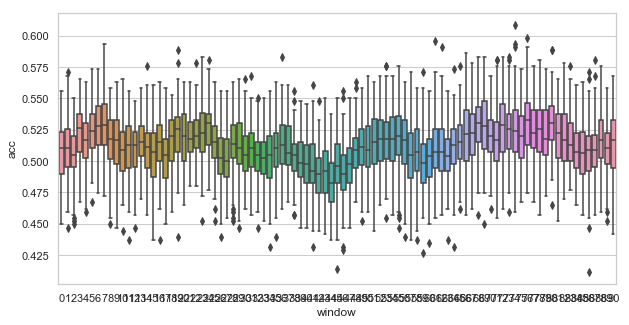

apnews.com


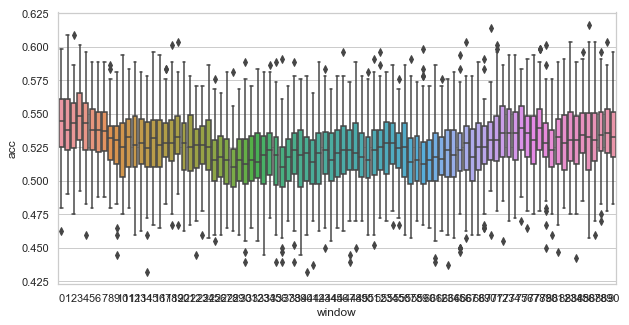

npr.org


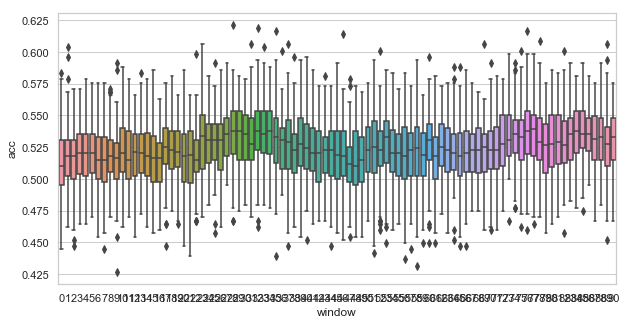

bloomberg.com


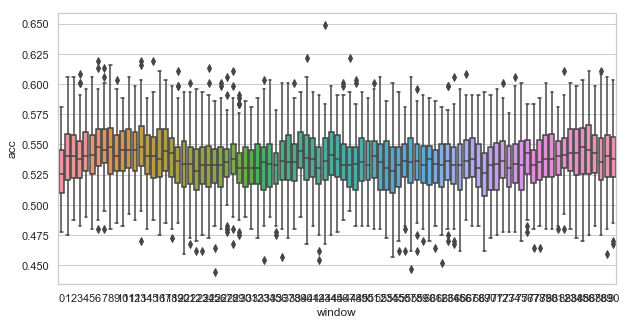

cnn.com


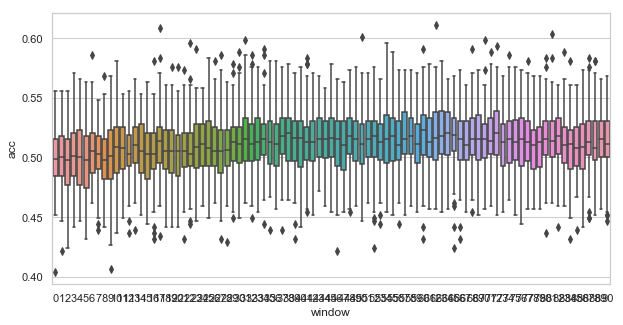

thehill.com


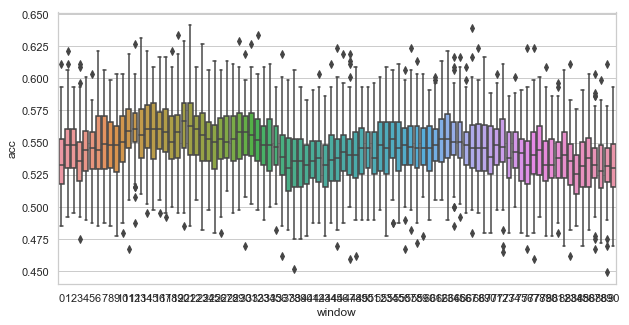

dailykos.com


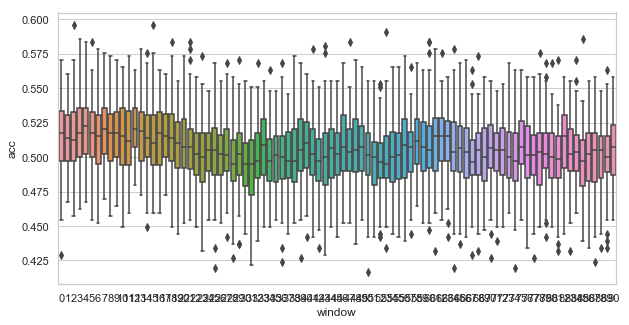

huffingtonpost.com


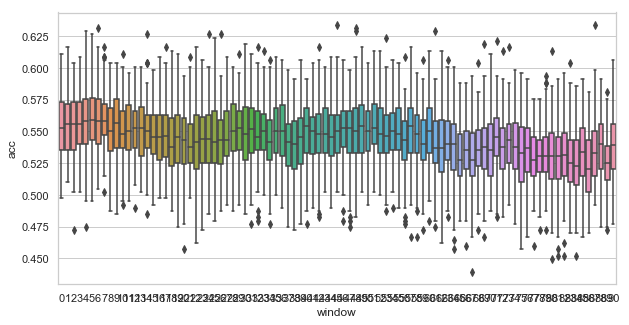

breitbart.com


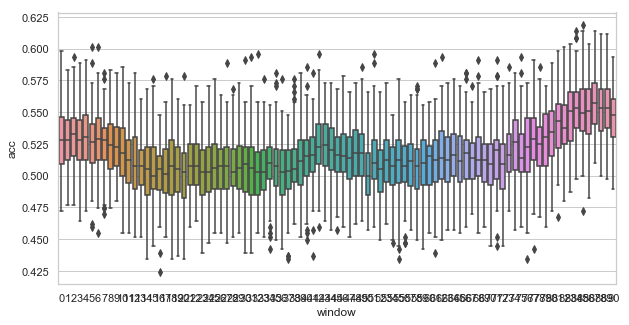

buzzfeed.com


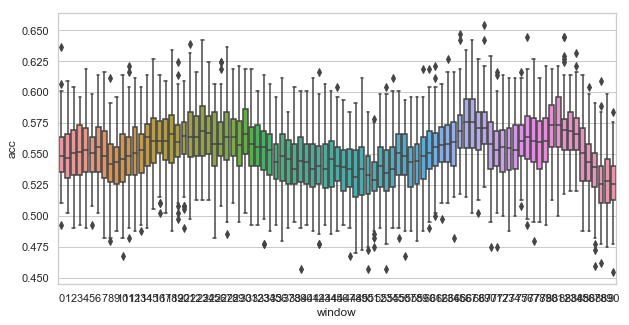

foxnews.com


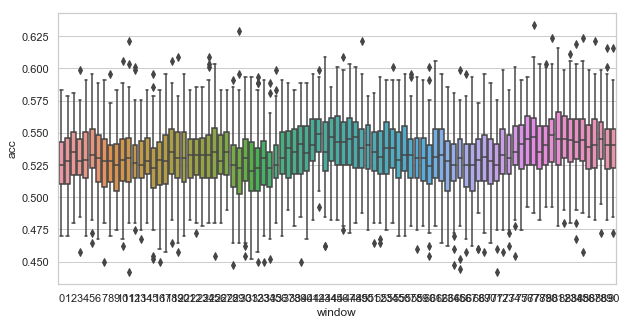

In [21]:
for d in accs.domain.unique():
    print(d)
    pdf = accs[accs.domain==d].sort_values('window')
    plt.figure(figsize=(10,5))
    sns.boxplot(x='window', y='acc', data=pdf)
    plt.show()